In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/1_projects/1_2024_8_taller_100_paginas_ml':
  os.chdir(r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/1_projects/1_2024_8_taller_100_paginas_ml')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/4d/qj4qr8zx1n36td0hlt0p7x_h0000gn/T/ipykernel_26749/481499019.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framewor

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generamos un conjunto de datos desbalanceado
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.90], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
# Definimos los pesos de las clases para tratar el desbalance
weights = {0: 1000, 1: 1}  # Aumentamos el peso de la clase minoritaria

# Creamos el clasificador SVM con los pesos de clase
clf = SVC(kernel='linear', class_weight=weights)

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Evaluamos el modelo
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [4]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Aplicamos SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Entrenamos un nuevo clasificador SVM con los datos sobremuestreados
clf_smote = SVC(kernel='linear')
clf_smote.fit(X_res, y_res)

# Evaluamos el modelo
y_pred = clf_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       1.00      0.99      0.99       224

    accuracy                           0.98       250
   macro avg       0.94      0.97      0.96       250
weighted avg       0.98      0.98      0.98       250



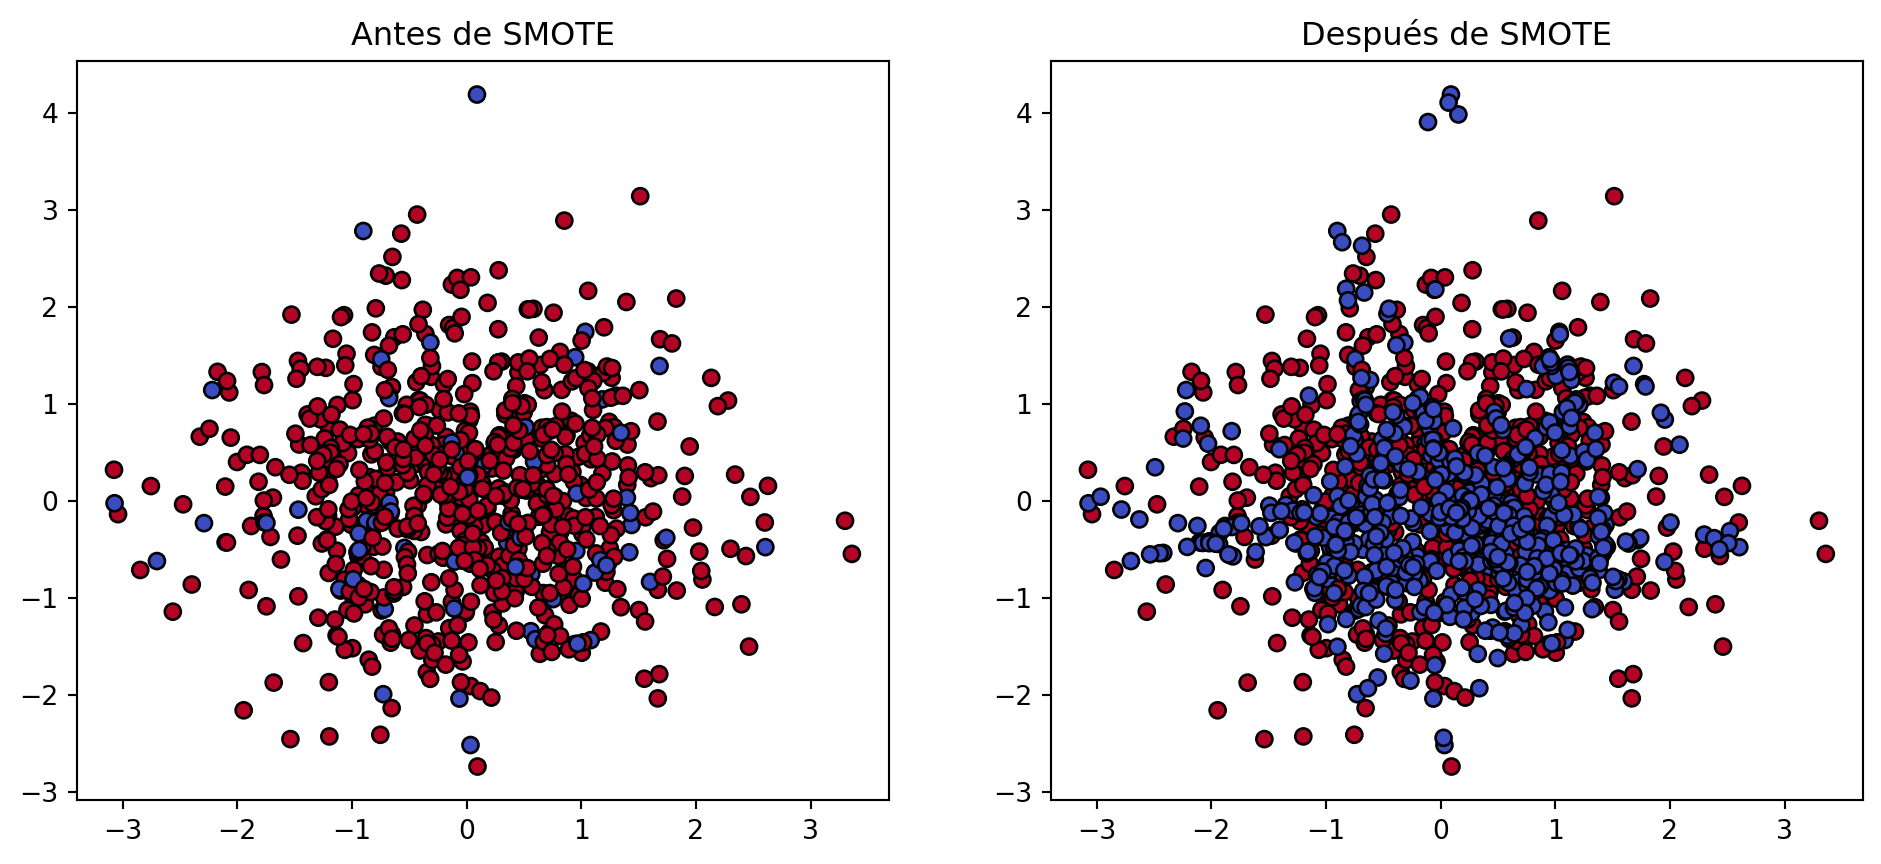

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Antes de SMOTE')

plt.subplot(1, 2, 2)
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Después de SMOTE')

plt.show()

In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# Generamos un conjunto de datos de regresión
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos varios modelos
model_rf = RandomForestRegressor(n_estimators=10, random_state=42).fit(X_train, y_train)
model_gb = GradientBoostingRegressor(n_estimators=10, random_state=42).fit(X_train, y_train)
model_lr = LinearRegression().fit(X_train, y_train)

# Predecimos y promediamos las predicciones
predictions = np.mean([model_rf.predict(X_test), model_gb.predict(X_test), model_lr.predict(X_test)], axis=0)

# Evaluamos el rendimiento del modelo promedio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse_rf = mean_squared_error(y_test, model_rf.predict(X_test))
mse_gb = mean_squared_error(y_test, model_gb.predict(X_test))
mse_lr = mean_squared_error(y_test, model_lr.predict(X_test))

print(f'MSE del modelo RF: {mse_rf}')
print(f'MSE del modelo GB: {mse_gb}')
print(f'MSE del modelo LR: {mse_lr}')
print(f'MSE del modelo promediado: {mse}')

MSE del modelo RF: 9445.970722326663
MSE del modelo GB: 20390.298586678025
MSE del modelo LR: 0.010704979443048707
MSE del modelo promediado: 5842.696381684256


In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Generamos un conjunto de datos de clasificación
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos varios clasificadores
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_lr = LogisticRegression()
model_svc = SVC(probability=True, random_state=42)

# Combinamos mediante voto de mayoría
eclf = VotingClassifier(estimators=[('rf', model_rf), ('lr', model_lr), ('svc', model_svc)], voting='hard')
eclf.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_svc.fit(X_train, y_train)


# Evaluamos el rendimiento
accuracy = eclf.score(X_test, y_test)
accuracy_rf = model_rf.score(X_test, y_test)
accuracy_lr = model_lr.score(X_test, y_test)    
accuracy_svc = model_svc.score(X_test, y_test)

print(f'Accuracy del modelo RF: {accuracy_rf}')
print(f'Accuracy del modelo LR: {accuracy_lr}')
print(f'Accuracy del modelo SVC: {accuracy_svc}')
print(f'Accuracy del modelo combinado mediante voto de mayoría: {accuracy}')

y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))

print(classification_report(y_test, model_rf.predict(X_test)))

Accuracy del modelo RF: 0.8333333333333334
Accuracy del modelo LR: 0.85
Accuracy del modelo SVC: 0.8333333333333334
Accuracy del modelo combinado mediante voto de mayoría: 0.8433333333333334
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       145
           1       0.88      0.81      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       145
           1       0.88      0.79      0.83       155

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definimos los modelos base y el meta-modelo
base_models = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
               ('svc', SVC(probability=True, random_state=42))]
meta_model = LogisticRegression()

# Creamos el modelo de apilamiento
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Entrenamos y evaluamos el modelo de apilamiento
stacking_model.fit(X_train, y_train)

accuracy = stacking_model.score(X_test, y_test)
print(f'Accuracy del modelo de apilamiento: {accuracy}')

print(classification_report(y_test, stacking_model.predict(X_test)))
print(classification_report(y_test, model_rf.predict(X_test)))
print(classification_report(y_test, model_svc.predict(X_test)))


Accuracy del modelo de apilamiento: 0.84
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       145
           1       0.86      0.82      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       145
           1       0.88      0.79      0.83       155

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       145
           1       0.86      0.81      0.83       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83

In [9]:
#| eval: false
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos con normalización
datagen = ImageDataGenerator(rescale=1./255)

# Suponiendo que 'directorio_de_datos' es el camino a las imágenes
train_generator = datagen.flow_from_directory(
    directorio_de_datos,
    target_size=(200, 200),  # Todas las imágenes se redimensionan a 200x200
    batch_size=32,
    class_mode='binary'  # o 'categorical' para clasificación multiclase
)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Crear un tokenizador para convertir palabras a índices
tokenizer = Tokenizer(num_words=10000)  # Considera las 10,000 palabras más comunes
tokenizer.fit_on_texts(textos)  # 'textos' es una lista de documentos de texto

# Convertir textos en secuencias de índices
sequences = tokenizer.texts_to_sequences(textos)

# Acolchar secuencias para que tengan la misma longitud
data = pad_sequences(sequences, maxlen=100)  # Longitud fija de 100 para todas las secuencias

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Crear un modelo simple como punto de partida
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),  # Ejemplo para datos vectorizados de longitud 100
    Dropout(0.5),  # Regularización mediante Dropout
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(data, etiquetas, epochs=10, validation_split=0.2)  # 'etiquetas' es un array de etiquetas